<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans - Penguins
</b></font> </br></p> 

---


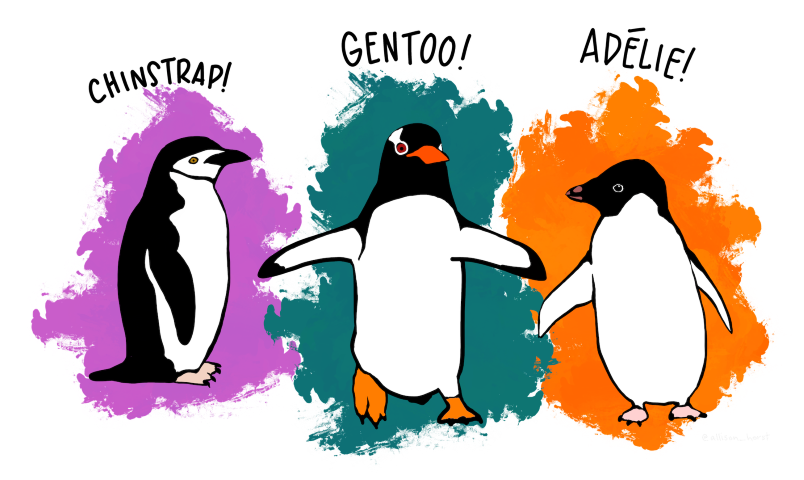

Quelle: Artwork by @allison_horst

# **1 <font color='orange'>|</font> Understand**
***



<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Palmerpinguine ist eine DataSet für die Datenexploration und -visualisierung. Die Daten wurden von Dr. Kristen Gorman und der Palmer Station, Antarktis LTER, einem Mitglied des Long Term Ecological Research Network, gesammelt und zur Verfügung gestellt.


[DataSet](https://www.openml.org/search?type=data&status=any&id=42585)

[Info](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)


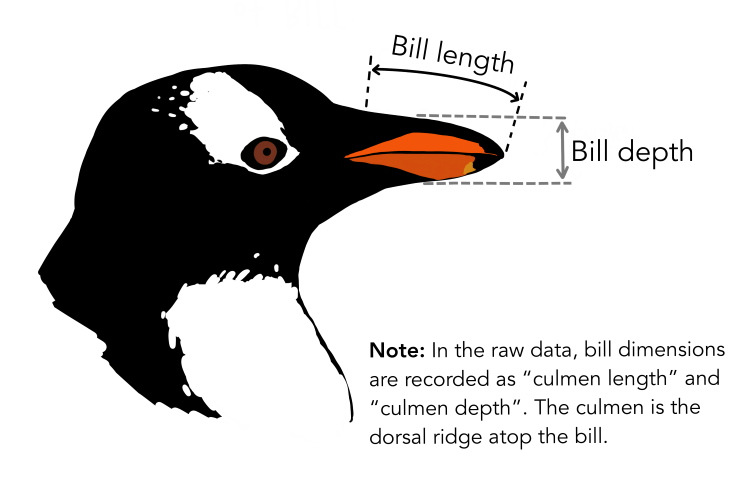

Quelle: Artwork by @allison_horst

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=42585)
# --- df.frame beinhaltet alle data und target - Trennung erfolgt später bei 2. Prepare

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>


In [3]:
df.frame

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.frame.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [5]:
df.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [6]:
df.frame.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [7]:
df.frame.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# **2 <font color='orange'>|</font> Prepare**

---


<p><font color='black' size="5">
Trennung data/features
</font></p>

In [8]:
target = df.frame.species
data = df.frame.drop(['species'], axis=1)

<p><font color='black' size="5">
Codierung der nicht numerischen Daten
</font></p>


In [9]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

In [10]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Behandlung fehlender Daten
</font></p>

In [ ]:
data.isnull().sum()

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
missing_data = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(missing_data.fit_transform(data), columns=data.columns)

# **3 <font color='orange'>|</font> Modeling**
---

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, n_init=100, max_iter=300, tol=1e-4, algorithm='auto', random_state=42, verbose=2)
model.fit(data)

In [ ]:
import pandas as pd
target_pred = pd.DataFrame(model.labels_)
target_pred.replace([-1, 0, 1, 2], ['noise', 'Adelie', 'Gentoo', 'Chinstrap'], inplace=True)

# **4 <font color='orange'>|</font> Evaluate**
---


**Bewertung ohne Vergleichdaten:**   
+ Der Silhouettenkoeffizient *s* gibt an, wie gut die Zuordnung der einzelnen Mitglieder zu den Clustern ist. 
+ Die Punktzahl ist zwischen -1 für falsches Clustering und +1 für sehr dichtes Clustering begrenzt. 
+ Werte um Null zeigen überlappende Cluster an. 
+ Die Punktzahl ist höher, wenn Cluster dicht und gut getrennt sind, was sich auf ein Standardkonzept eines Clusters bezieht.

    
**Bewertung mit Vergleichsdaten:**   
+ Homogenität : Jeder Cluster enthält nur Mitglieder einer einzigen Klasse.
+ Vollständigkeit : Alle Mitglieder einer bestimmten Klasse werden demselben Cluster zugeordnet.
+ Beide sind unten durch 0,0 und oben durch 1,0 begrenzt (höher ist besser).

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
 from sklearn.metrics import silhouette_score
 s_score = silhouette_score(data, model.labels_, metric='euclidean')
 print(f'Silhouettenkoeffizient: {s_score:0.2f}')

Visualize

In [ ]:
pd.DataFrame(model.labels_).value_counts()

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, colors='reset')
visualizer.fit(data) 

**Distortion**:   
Sie wird als Mittelwert der quadrierten Abstände von den Clusterzentren der jeweiligen Cluster berechnet. Typischerweise wird die euklidische Distanzmetrik verwendet.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,8), metric='distortion')

visualizer.fit(data) 
visualizer.show()        

<p><font color='black' size="5">
Homogenität & Vollständigkeit
</font></p>

In [19]:
from sklearn.metrics import homogeneity_score, completeness_score
print ('Metriken:')
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)
h_score = homogeneity_score(target, model.labels_)
c_score = completeness_score(target, model.labels_)

print(f'Erwartete Zahl von Clustern: {n_clusters_}')
print(f'Erwartete Zahl von noise points: {n_noise_}')
print(f'Homogenität: {h_score:0.2f}')
print(f'Vollständigkeit: {c_score:0.2f}')

Metriken:
Erwartete Zahl von Clustern: 3
Erwartete Zahl von noise points: 0
Homogenität: 0.39
Vollständigkeit: 0.39


<p><font color='black' size="5">
Streupunktdiagramme
</font></p>

LDA

In [33]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data, target)
data_lda = pd.DataFrame(data_lda)
data_lda.columns =['LDA1', 'LDA2']

PCA

In [34]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.columns =['PCA1', 'PCA2']

LDA Streupunktdieagramme

In [35]:
import plotly.express as px
import numpy as np

data_lda['class real'] = np.array(target)
data_lda['class pred'] = np.array(target_pred)

plot_1 = px.scatter(data_lda, x = 'LDA1',
				y = 'LDA2',
				color='class real',
				symbol = 'class real')
plot_2 = px.scatter(data_lda, x = 'LDA1',
				y = 'LDA2',
				color='class pred',
				symbol = 'class pred')

plot_1.update_layout(height=400, width=600, title_text="Performance Class real")
plot_2.update_layout(height=400, width=600, title_text="Performance Class pred")

plot_1.show()
plot_2.show()

PCA Streupunktdiagramme

In [36]:
import plotly.express as px
import numpy as np

data_pca['class real'] = np.array(target)
data_pca['class pred'] = np.array(target_pred)

plot_1 = px.scatter(data_pca, x = 'PCA1',
				y = 'PCA2',
				color='class real',
				symbol = 'class real')
plot_2 = px.scatter(data_pca, x = 'PCA1',
				y = 'PCA2',
				color='class pred',
				symbol = 'class pred')

plot_1.update_layout(height=400, width=600, title_text="Performance Class real")
plot_2.update_layout(height=400, width=600, title_text="Performance Class pred")

plot_1.show()
plot_2.show()

# **5 <font color='orange'>|</font> Deploy**
---